In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [62]:
import os
path = 'lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes

['lung_aca', 'lung_n', 'lung_scc']

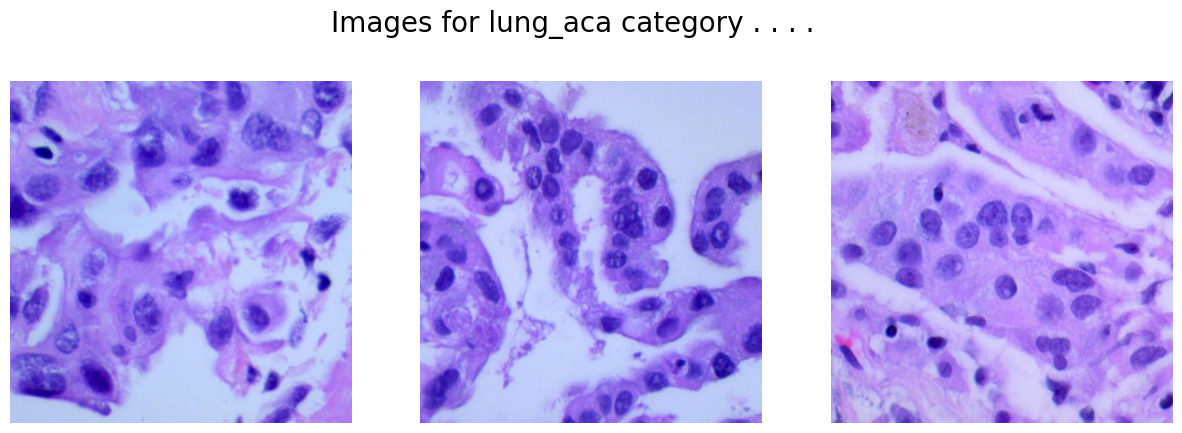

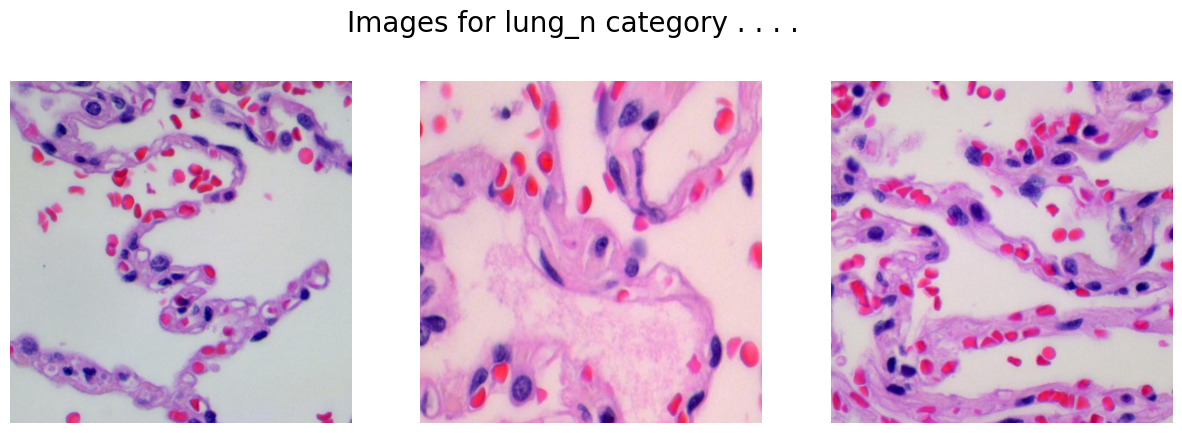

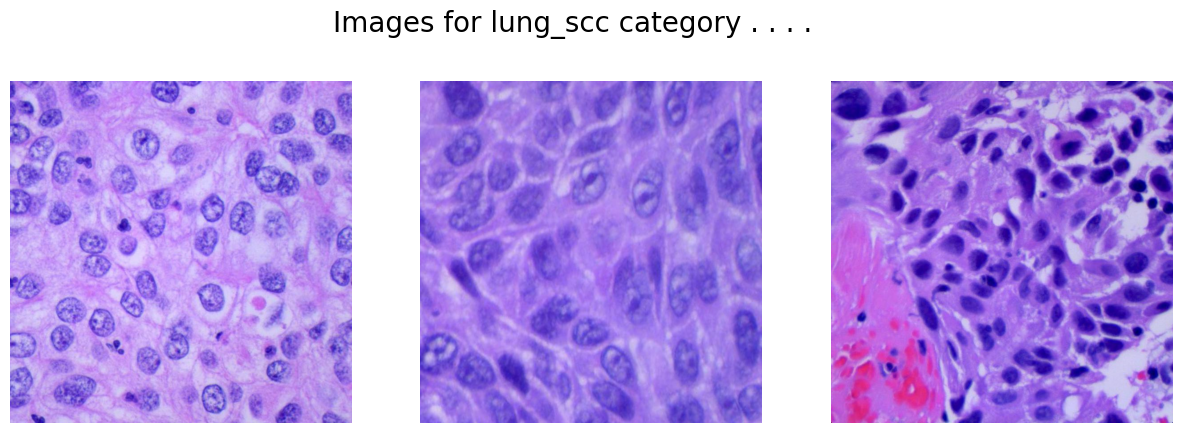

In [63]:
['lung_aca', 'lung_n', 'lung_scc']
path = 'lung_colon_image_set/lung_image_sets'

for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()

In [64]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the original dataset
path = "lung_colon_image_set/lung_image_sets"

# Paths for the new directories
base_dir = "splitted_dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Create new directories
for split_dir in [train_dir, val_dir, test_dir]:
    for class_name in ["lung_aca", "lung_n", "lung_scc"]:  # Your class names
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

# Split data
for class_name in ["lung_aca", "lung_n", "lung_scc"]:
    class_dir = os.path.join(path, class_name)
    images = os.listdir(class_dir)

    # Train-Test-Validation Split
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Move images to respective folders
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(train_dir, class_name))
    for image in val_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(val_dir, class_name))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(test_dir, class_name))

print("Dataset split and reorganized successfully!")


Dataset split and reorganized successfully!


In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to datasets
train_path = "splitted_dataset/train"
val_path = "splitted_dataset/val"
test_path = "splitted_dataset/test"

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],  # Brightness adjustment
    channel_shift_range=50.0 
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation/test

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  # Use sparse for integer labels (0, 1, 2)
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 9000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [77]:
dirpath='lung_colon_image_set/lung_image_sets'
IMG_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20
INPUT_SHAPE = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
N_CLASSES = 3


In [78]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    dirpath,
    seed=123,
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)
classes_name=dataset.class_names
classes_name

Found 15000 files belonging to 3 classes.


['lung_aca', 'lung_n', 'lung_scc']

In [79]:
for batch_img,batch_label in dataset.take(1):
    print(batch_img.shape)
    print(batch_label.numpy())

(32, 224, 224, 3)
[0 1 2 0 0 0 0 1 1 1 0 2 1 0 2 2 2 0 2 2 1 1 1 0 2 0 2 1 0 0 1 1]


In [ ]:
'''
def split_train_val_test(dataset, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=15000):
    assert (train_split + val_split + test_split) == 1

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    # Calculate sizes
    total_size = len(dataset)
    train_size = int(train_split * total_size)
    val_size = int(val_split * total_size)
    test_size = total_size - train_size - val_size  # Ensure all samples are used

    # Split datasets
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds
'''

In [80]:
import os

# Paths to pre-split datasets
train_path = "splitted_dataset/train"
val_path = "splitted_dataset/val"
test_path = "splitted_dataset/test"

# Count the number of samples in each dataset
def count_samples(path):
    total = 0
    for class_name in os.listdir(path):  # Iterate over class directories
        class_dir = os.path.join(path, class_name)
        if os.path.isdir(class_dir):  # Ensure it's a directory
            total += len(os.listdir(class_dir))  # Count files in the class directory
    return total

# Get counts
num_train = count_samples(train_path)
num_val = count_samples(val_path)
num_test = count_samples(test_path)

# Print counts
print("Number of training samples:", num_train)
print("Number of validation samples:", num_val)
print("Number of test samples:", num_test)

Number of training samples: 9000
Number of validation samples: 3000
Number of test samples: 3000


In [70]:
resize_scaling=tf.keras.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1./255)
])

In [90]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet-50 pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for multiclass classification
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better generalization
    Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if labels are one-hot
              metrics=['accuracy',])

# Display the model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,691 (9.87 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [91]:
'''
logs from tensorflow.keras import callbacks
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
checkpoint =tf.keras.callbacks.ModelCheckpoint("lungs.keras",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min',restore_best_weights=True)
'''

'\nlogs from tensorflow.keras import callbacks\ntensorboard = tf.keras.callbacks.TensorBoard(log_dir = \'logs\')\ncheckpoint =tf.keras.callbacks.ModelCheckpoint("lungs.keras",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)\nreduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor = \'val_loss\', factor = 0.3, patience = 2, min_delta = 0.001,\n                              mode=\'auto\',verbose=1)\nearly_stopping = callbacks.EarlyStopping(monitor=\'val_loss\', patience=5, mode=\'min\',restore_best_weights=True)\n'

In [92]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [93]:
batch = next(train_generator)
print(f"Train batch shape: {batch[0].shape}, Labels shape: {batch[1].shape}")

batch = next(val_generator)
print(f"Validation batch shape: {batch[0].shape}, Labels shape: {batch[1].shape}")


Train batch shape: (32, 224, 224, 3), Labels shape: (32,)
Validation batch shape: (32, 224, 224, 3), Labels shape: (32,)


In [94]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 210s 726ms/step - accuracy: 0.8577 - loss: 2.4274 - val_accuracy: 0.8977 - val_loss: 0.5847
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 247s 861ms/step - accuracy: 0.9170 - loss: 0.4575 - val_accuracy: 0.9327 - val_loss: 0.3129
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 231s 804ms/step - accuracy: 0.9271 - loss: 0.3160 - val_accuracy: 0.9287 - val_loss: 0.2806
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 217s 755ms/step - accuracy: 0.9241 - loss: 0.2923 - val_accuracy: 0.8517 - val_loss: 0.4683
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 208s 728ms/step - accuracy: 0.9082 - loss: 0.3257 - val_accuracy: 0.9040 - val_loss: 0.3230
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 202s 705ms/step - accuracy: 0.9204 - loss: 0.2849 - val_accuracy: 0.9010 - val_loss: 0.2980
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 218s 761ms/step - accuracy: 0.9206 - loss: 0.2805 - val_accuracy: 0.9423 - val_loss: 0.2336
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 206s 721ms/step - accuracy: 0.9148 -